In [1]:
import pandas as pd

filenames = [
    'chep_contrib_2023.csv',
    'chep_contrib_2021.csv',
    'chep_contrib_2019.csv',
    'chep_contrib_2018.csv',
    'chep_contrib_2016.csv',
]

key_words = [
    'AI',
    'machine learning', 'ML',
    'neural network', 
    'deep learning', 
    'Generative Adversarial Network', 'GAN',
    'encoder',
    'diffusion model'
]

In [10]:
stats = []
kw_titles_df = pd.DataFrame()


for filename in filenames:
    year = int(filename[13:17])
    df = pd.read_csv(filename)
    cur_year_dict = {'year': year}
    title_set = set()

    for kw in key_words:
        count = df['Title'].str.contains(kw, case=False).sum()
        cur_year_dict.update({kw: count})
        
        filtered_titles = df[df['Title'].str.contains(kw, case=False)]
        for title in filtered_titles['Title']:
            title_set.add(title)
    
    filtered_rows = df[df['Title'].isin(list(title_set))]
    kw_titles_df = pd.concat([kw_titles_df, filtered_rows])
    
    cur_year_dict.update({'sum': len(title_set)}) 
    
    stats.append(cur_year_dict)

# print(stats)

In [11]:
stats_df = pd.DataFrame(stats)
print(stats_df)

   year  AI  machine learning  ML  neural network  deep learning  \
0  2023  45                32  10              17              6   
1  2021  13                 3   3               9              6   
2  2019  31                15   8               6              5   
3  2018  36                16   2               7              6   
4  2016  21                 6   2               2              2   

   Generative Adversarial Network  GAN  encoder  diffusion model  sum  
0                               2    2        3                1  112  
1                               3    2        1                0   38  
2                               4    3        0                0   69  
3                               1    0        1                0   67  
4                               0    1        0                0   33  


<AxesSubplot:xlabel='year'>

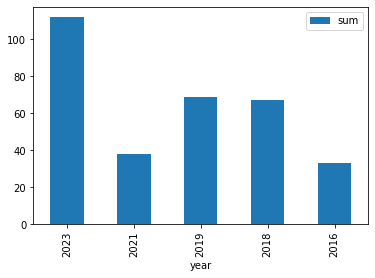

In [12]:
stats_df.plot(x='year',y='sum', kind='bar')

In [14]:
print(kw_titles_df)
kw_titles_df.to_csv(f'CHEP_ML.csv', index=False)

     Year                                               Link  \
5    2023  https://indico.jlab.org/event/459/contribution...   
8    2023  https://indico.jlab.org/event/459/contribution...   
9    2023  https://indico.jlab.org/event/459/contribution...   
21   2023  https://indico.jlab.org/event/459/contribution...   
24   2023  https://indico.jlab.org/event/459/contribution...   
..    ...                                                ...   
483  2016  https://indico.cern.ch/event/505613/contributi...   
493  2016  https://indico.cern.ch/event/505613/contributi...   
505  2016  https://indico.cern.ch/event/505613/contributi...   
520  2016  https://indico.cern.ch/event/505613/contributi...   
552  2016  https://indico.cern.ch/event/505613/contributi...   

                                                 Title  \
5    Distributed Machine Learning with PanDA and iD...   
8    Machine learning for ambiguity resolution in ACTS   
9    MLHad: Simulating Hadronization with Machine L...   